## House Price Prediction Linear Regression Project

Author: Aryahi Nittur

Data: Tony Pino's Melbourne Housing Dataset

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [77]:
df = pd.read_csv("/Users/aryahi/Documents/BDAA Projects/Regression Model/House Price Forcasting/data/raw/melb_data copy.csv").dropna()

In [78]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [79]:
#ensure clean data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtitude  

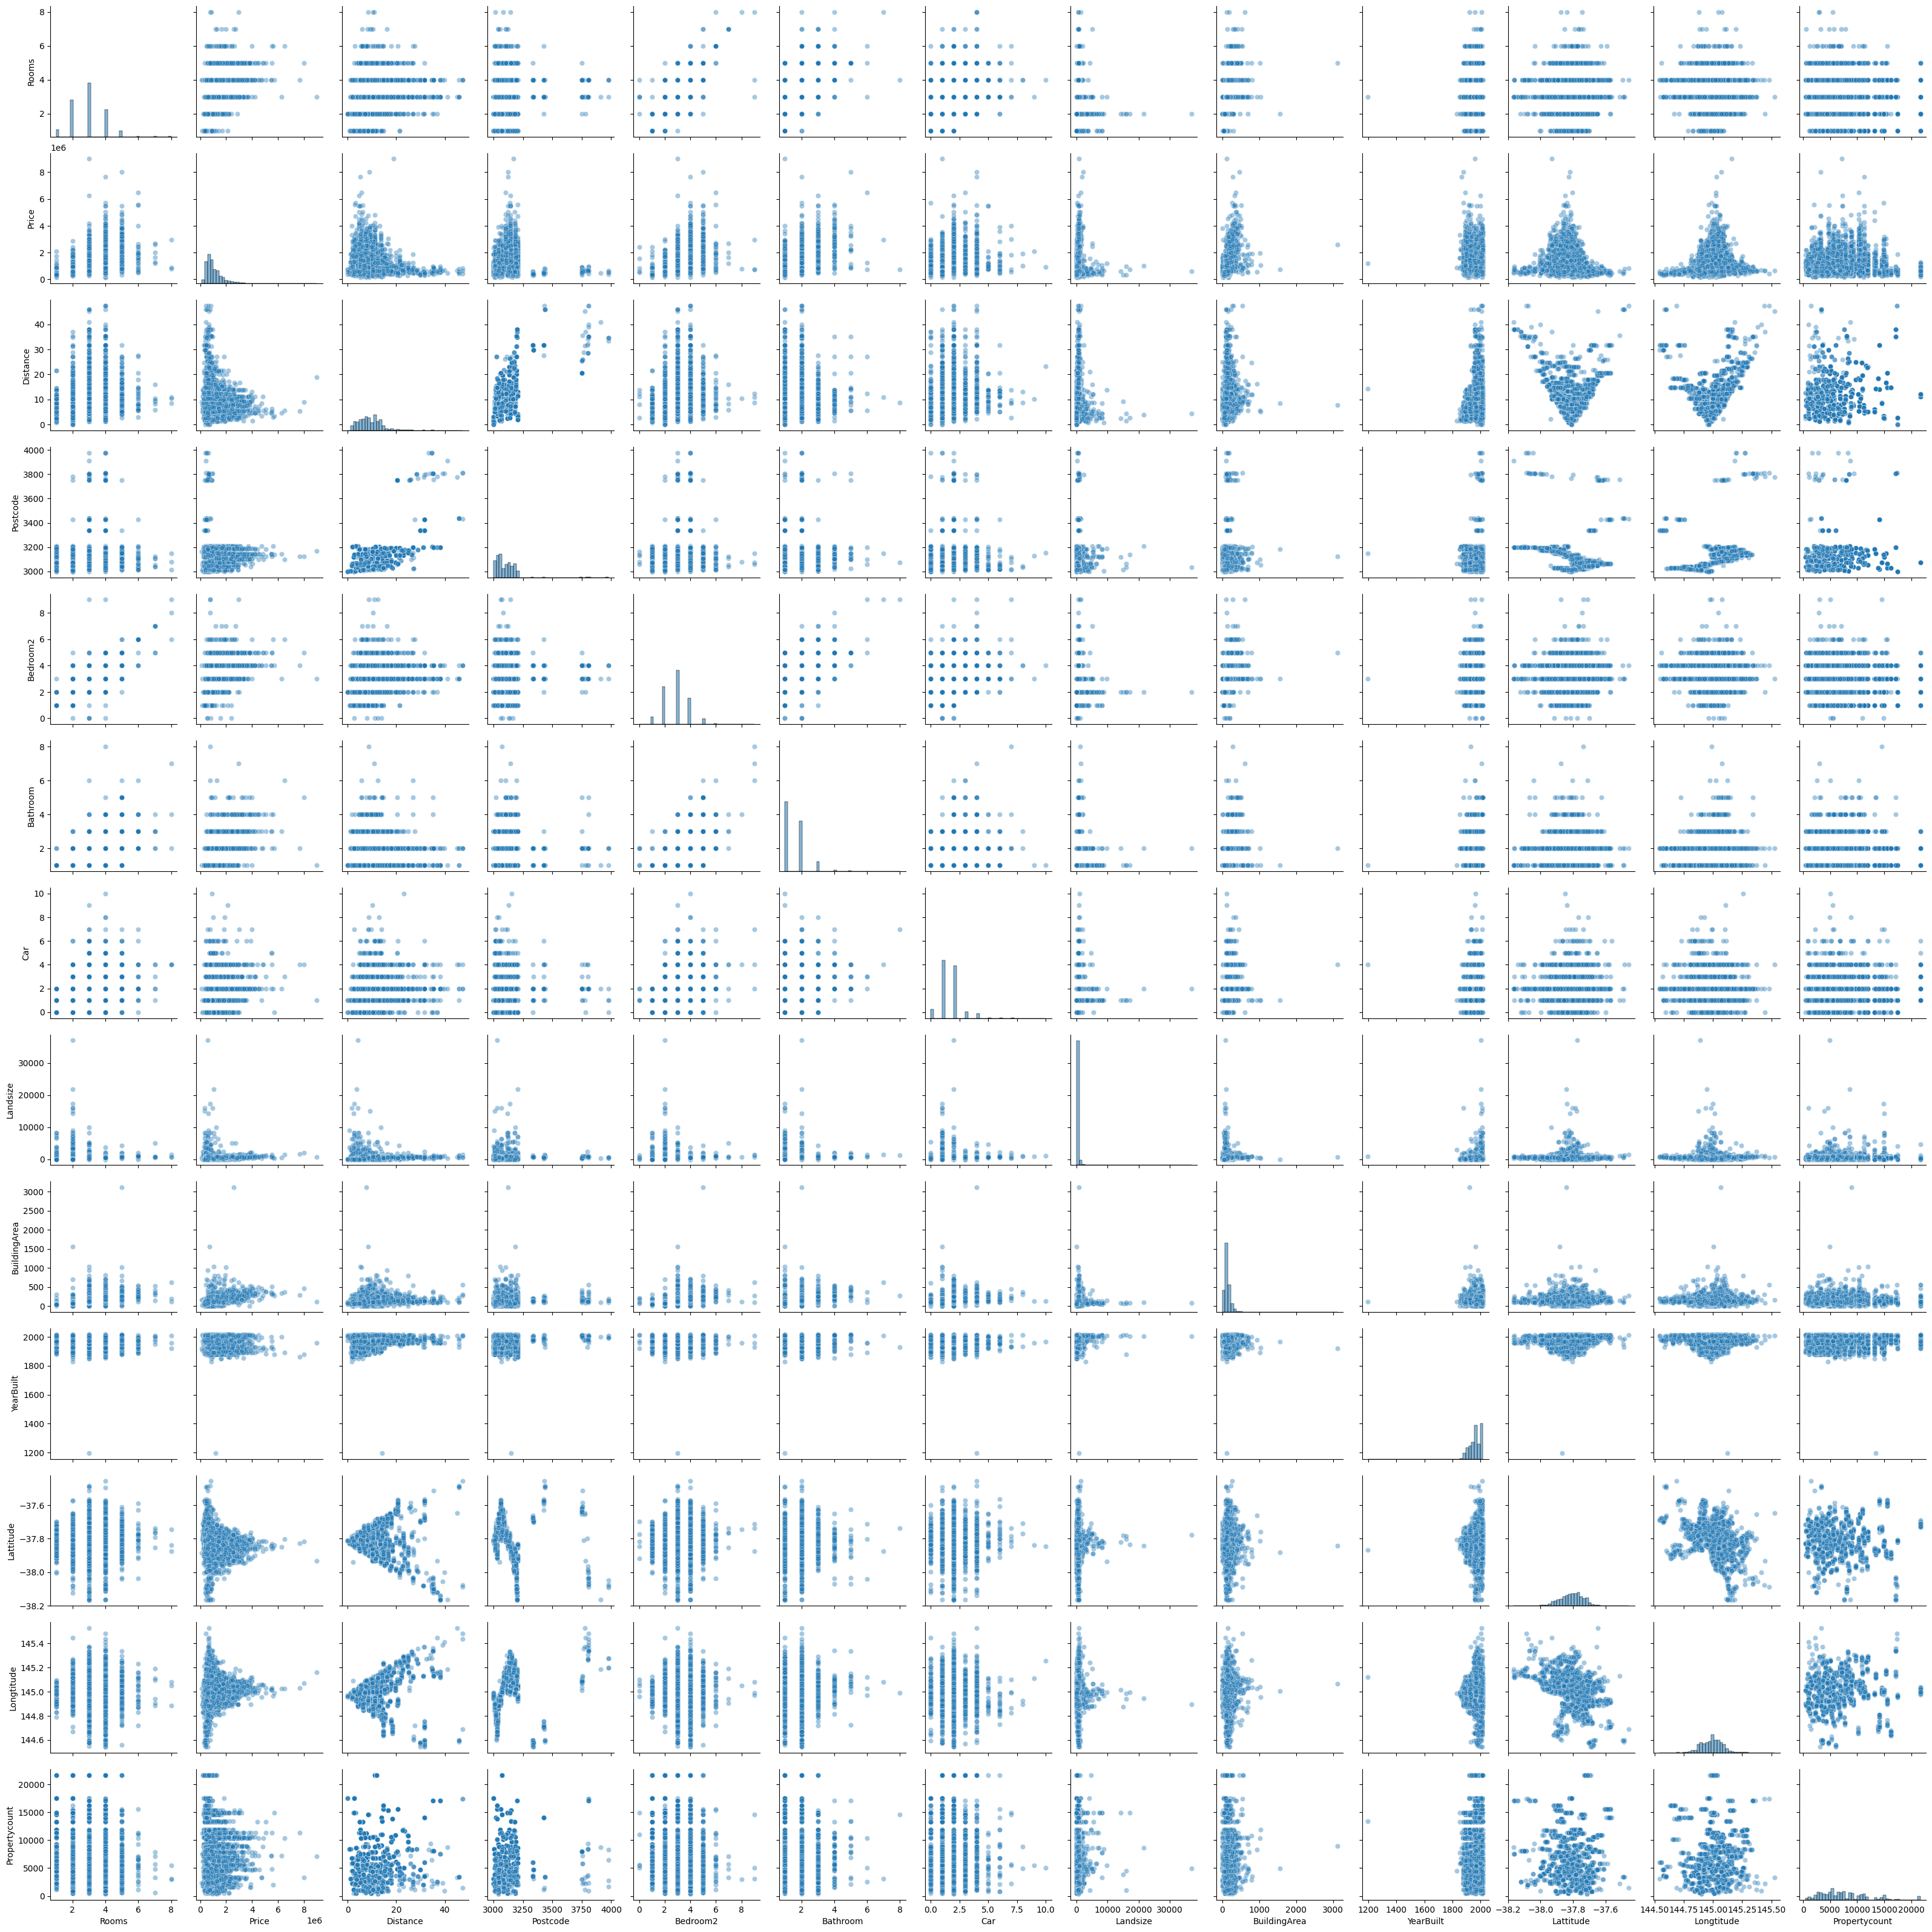

In [80]:
sns.pairplot(df, kind="scatter", plot_kws={'alpha':0.4}, diag_kws={'alpha':0.55, 'bins':40})

# distance describes the distance from Melbourne's Cenral Business District

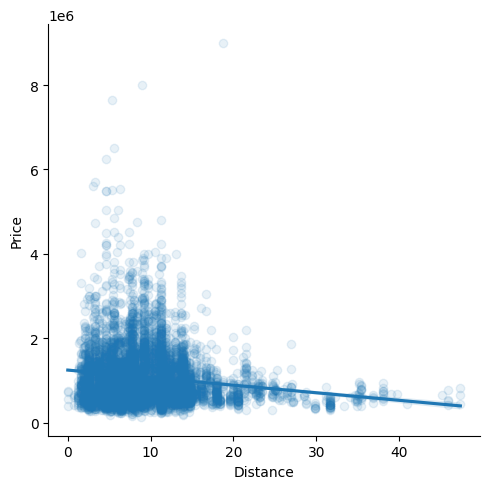

In [81]:
sns.lmplot(x='Distance', 
           y='Price', 
           data=df,
           scatter_kws={'alpha':0.1})

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Change object type variables into numerical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtitude  

In [84]:
# one-hot 
df_encoded = pd.get_dummies(df, columns=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'], drop_first=True)

In [85]:
df_encoded.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt',
       ...
       'CouncilArea_Wyndham', 'CouncilArea_Yarra', 'CouncilArea_Yarra Ranges',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object', length=6710)

In [86]:
X = df_encoded.drop(['Price', 'Car', 'Postcode'], axis=1)
y = df['Price']

X.columns

Index(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       ...
       'CouncilArea_Wyndham', 'CouncilArea_Yarra', 'CouncilArea_Yarra Ranges',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object', length=6707)

In [87]:
# ensure remaining columns are numeric types
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()


In [88]:
# prevent mismatching after using .dropna()
y = y[X.index]

In [89]:
X = sm.add_constant(X)

In [90]:
# Training the model
# used the reccomended 80% training and 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

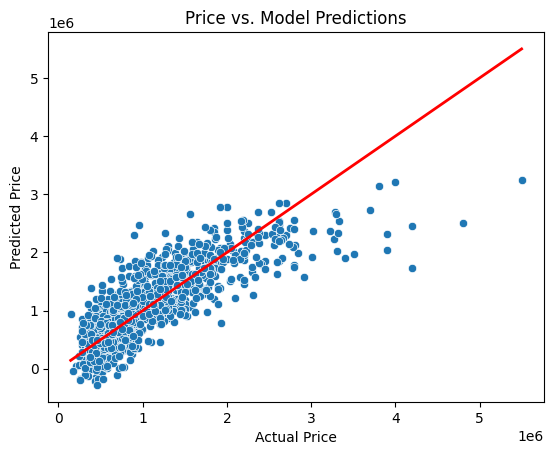

In [91]:
predictions = lm.predict(X_test)
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.title('Price vs. Model Predictions')

# add diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linewidth=2)


In [92]:
# effectiveness of this model in predicting the house price
lm.score(X, y)

0.9360008814623896

Text(0.5, 1.0, 'Price Distribution by Region')

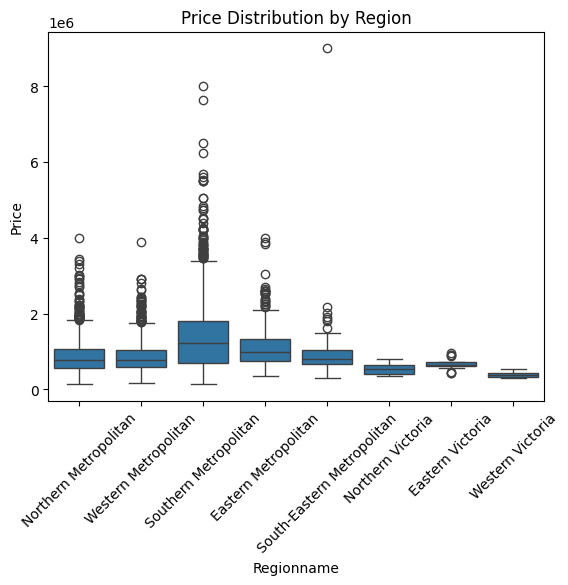

In [93]:
sns.boxplot(x='Regionname', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Region')


In [94]:
# statistical analysis of model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [95]:
# look at coefficent weight
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

# key statistics
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

                                                Coef
const                                      -0.000078
Rooms                                   56633.334369
Distance                               -29882.160464
Bedroom2                               174958.256485
Bathroom                               186154.623829
...                                              ...
Regionname_Northern Victoria           193611.893443
Regionname_South-Eastern Metropolitan  101662.719498
Regionname_Southern Metropolitan        41949.229680
Regionname_Western Metropolitan       -356743.706028
Regionname_Western Victoria            -13002.405003

[6708 rows x 1 columns]
Mean Absolute Error: 277257.71374756645
Mean Squared Error: 145747941969.98044
Root Mean Squared Error: 381769.4880028791


Text(0.5, 1.0, 'Residuals vs. Predicted Price')

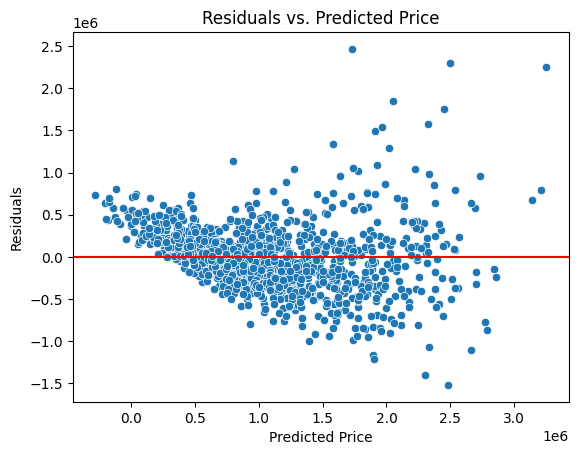

In [96]:
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Price')

